In [104]:
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
file = 'volcanoes.csv'
df = pd.read_csv(file)

In [48]:
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 36 columns):
Year                                  458 non-null int64
Month                                 446 non-null float64
Day                                   417 non-null float64
TSU                                   67 non-null object
EQ                                    22 non-null object
Name                                  458 non-null object
Location                              458 non-null object
Country                               458 non-null object
Latitude                              458 non-null float64
Longitude                             458 non-null float64
Elevation                             458 non-null int64
Type                                  458 non-null object
Status                                458 non-null object
Time                                  458 non-null object
VEI                                   331 non-null float64
Agent                   

In [89]:
#Create Bins of Decades
bins = [1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2018]

group_names = ["1900s", "1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s" ]

df["Decade"] = pd.cut(df["Year"], bins, labels=group_names)

               Total Eruptions
Indonesia                  121
Japan                       85
Philippines                 28
Italy                       25
United States               24


(-1.103744698021847,
 1.1238138592311968,
 -1.1111159487056415,
 1.228984806838477)

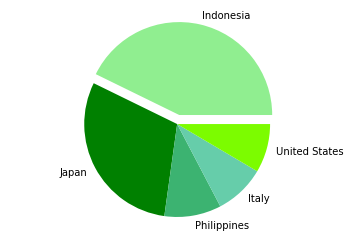

In [205]:
#Which country had the most erputions over the 100 years?
total_eruptions_county = df['Country'].value_counts()

total_erupts_country1 = total_eruptions_county.head()

pie_chart = pd.DataFrame({"Total Eruptions": total_erupts_country1})
print(pie_chart)

explode = [0.1,0,0,0,0]
colors = ['lightgreen', 'g', 'mediumseagreen', 'mediumaquamarine', 'lawngreen']
plt.pie(pie_chart["Total Eruptions"], labels = pie_chart.index, explode = explode, colors=colors)
plt.axis("equal")


In [91]:
#What year had the most eruptions?
total_eruptions_year = df['Year'].value_counts()
total_eruptions_year.head()

2018    11
1990    10
2011    10
1997     9
1953     9
Name: Year, dtype: int64

In [92]:
#What month had the most eruptions?
total_eruptions_month = df['Month'].value_counts()
total_eruptions_month.head()

#change months from numbers to words - come back to this later!!!!

8.0    51
7.0    45
1.0    44
5.0    43
9.0    42
Name: Month, dtype: int64

In [93]:
#What is distrubtion over magnitudes (VEI)?
total_eruptions_per_vei = df['VEI'].value_counts()
total_eruptions_per_vei.head()


3.0    124
2.0    118
1.0     39
4.0     34
5.0      7
Name: VEI, dtype: int64

In [94]:
#Top 10 magnitudes 

df1 = df[['Name', 'VEI', 'Location']]
df1.sort_values(by='VEI', ascending=False)


top_10_eruptions = df1.loc[df1['VEI'] > 4.9]

top_10_eruptions.sort_values(by='VEI', ascending=False)

,Name,VEI,Location
12,Santa Maria,6.0,Guatemala
33,Novarupta,6.0,Alaska Peninsula
294,Pinatubo,6.0,Luzon-Philippines
155,Bezymianny,5.0,Kamchatka
173,Agung,5.0,Lesser Sunda Is
243,St. Helens,5.0,US-Washington
253,"Chichon, El",5.0,Mexico
254,"Chichon, El",5.0,Mexico
256,"Chichon, El",5.0,Mexico
297,"Hudson, Cerro",5.0,Chile-S


In [95]:
#DAMAGE_MILLIONS_DOLLARS  
top_damage_millions = df.sort_values(by='DAMAGE_MILLIONS_DOLLARS', ascending=False)

top_damage_millions_df = top_damage_millions[['Name', 'Year', 'VEI', 'Location', 'DAMAGE_MILLIONS_DOLLARS']]

top_damage_millions_df.head(10)


,Name,Year,VEI,Location,DAMAGE_MILLIONS_DOLLARS
243,St. Helens,1980,5.0,US-Washington,2000.00
398,Merapi,2010,NaN,Java,600.00
435,Sinabung,2016,NaN,Sumatra,100.00
321,Rabaul,1994,3.0,New Britain-SW Pac,35.00
255,Galunggung,1982,4.0,Java,15.00
425,Kilauea,2014,NaN,Hawaiian Is,14.50
246,Etna,1981,2.0,Italy,10.00
448,Mayon,2018,NaN,Luzon-Philippines,3.72
253,"Chichon, El",1982,5.0,Mexico,3.30
302,"Negro, Cerro",1992,3.0,Nicaragua,3.00


In [96]:
#Whats the most damage total by eruption(summed)?

total_damage_greater_than_zero = df.loc[df['DAMAGE_MILLIONS_DOLLARS'] > 0]

total_damage_volcano = total_damage_greater_than_zero.groupby('Name')['DAMAGE_MILLIONS_DOLLARS'].sum()

total_damage_volcano

Name
Chichon, El        3.30
Etna              12.50
Galunggung        15.00
Kilauea           15.50
Mayon              3.72
Merapi           600.00
Negro, Cerro       3.00
Rabaul            35.00
Sakura-jima        0.04
Sinabung         100.00
Spurr              2.00
St. Helens      2000.00
Name: DAMAGE_MILLIONS_DOLLARS, dtype: float64

In [97]:
# Total Damage (sum of individual damage)

total_damage_sum = total_damage_volcano.sum()
total_damage_sum

2790.06

In [98]:
#Most damanage by year in millions?
total_damage_greater_than_zero = df.loc[df['DAMAGE_MILLIONS_DOLLARS'] > 0]

total_damage_volcano_year = total_damage_greater_than_zero.groupby('Year')['DAMAGE_MILLIONS_DOLLARS'].sum()

total_damage_volcano_year

Year
1914       0.04
1980    2000.00
1981      10.00
1982      18.30
1991       2.50
1992       5.00
1994      35.00
2010     600.00
2014      14.50
2016     100.00
2018       4.72
Name: DAMAGE_MILLIONS_DOLLARS, dtype: float64

In [159]:
total_damage_decade = total_damage_greater_than_zero.groupby('Decade')['DAMAGE_MILLIONS_DOLLARS'].sum()

total_damage_decade 



Decade
1900s       0.00
1910s       0.04
1920s       0.00
1930s       0.00
1940s       0.00
1950s       0.00
1960s       0.00
1970s       0.00
1980s    2028.30
1990s      42.50
2000s       0.00
2010s     719.22
Name: DAMAGE_MILLIONS_DOLLARS, dtype: float64

In [99]:
#Most deaths 

top_deaths = df.sort_values(by='TOTAL_DEATHS', ascending=False)

top_deaths1 = top_deaths[['Name', 'Year', 'VEI', 'Location', 'TOTAL_DEATHS']]

top_10_deaths = top_deaths1.head()

top_10_deaths

,Name,Year,VEI,Location,TOTAL_DEATHS
8,Pelee,1902,4.0,W Indies,28000.0
266,Ruiz,1985,3.0,Colombia,23080.0
12,Santa Maria,1902,6.0,Guatemala,10000.0
54,Kelut,1919,4.0,Java,5110.0
128,Lamington,1951,4.0,New Guinea,2942.0


In [100]:
#Total Deaths - what unit is this in?? millions?
total_deaths = top_deaths1['TOTAL_DEATHS'].sum()
total_deaths

93945.0

In [101]:
df.head()

,Year,Month,Day,TSU,EQ,Name,Location,Country,Latitude,Longitude,...,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,Decade
0,1900,1.0,22.0,NaN,NaN,Asama,Honshu-Japan,Japan,36.400,138.530,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s
1,1900,2.0,16.0,NaN,NaN,Kirishima,Kyushu-Japan,Japan,31.930,130.870,...,1.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,1900s
2,1900,7.0,17.0,NaN,NaN,Adatara,Honshu-Japan,Japan,37.620,140.280,...,2.0,NaN,NaN,10.0,1.0,NaN,NaN,NaN,NaN,1900s
3,1900,NaN,NaN,NaN,NaN,Tullu Moje,Africa-NE,Ethiopia,8.158,39.130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s
4,1901,5.0,22.0,NaN,NaN,Kelut,Java,Indonesia,-7.930,112.308,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s


In [103]:
#Eruptions by Decade 

total_eruptions_decade = df['Decade'].value_counts()
total_eruptions_decade

1990s    70
2010s    66
1970s    46
1980s    40
2000s    39
1950s    38
1960s    34
1910s    32
1900s    26
1940s    25
1930s    22
1920s    20
Name: Decade, dtype: int64

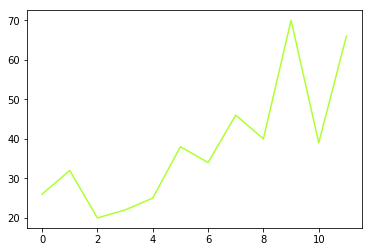

In [157]:
new_df = pd.DataFrame({"Total Eruptions" : total_eruptions_decade}).reset_index()

new_df

new_df1 = new_df.reindex([8,7,11,10,9,5,6,2,3,0,4,1])

df2 = new_df1.reset_index()
plt.plot(df2["Total Eruptions"], color='greenyellow')

In [114]:
#Tsunamis

tsunamis = df['TSU'].value_counts()
tsunamis

TSU    67
Name: TSU, dtype: int64

In [115]:
#EQs

eqs = df['EQ'].value_counts()
eqs

EQ    22
Name: EQ, dtype: int64

<BarContainer object of 3 artists>

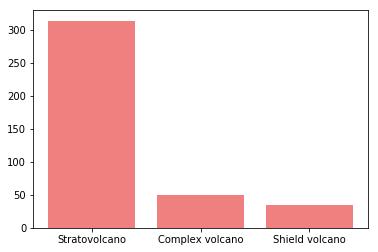

In [217]:
#Eruptions by type 

eruptions_by_type = df['Type'].value_counts()

bar = eruptions_by_type.head(3)

plt.bar(bar.index, bar, color ='lightcoral')